In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD

### 1. 讀入 MNSIT 數據集

In [3]:
from torchvision import datasets

以下要由 datasets 中的 MNIST 讀入訓練資料, 注意參數中 

* `'./data'` 是說下載後存在 `data` 資料夾
* `train=True` 意思是這是訓練資料
* `download=True` 意思是要下載到我們的磁碟機中

In [4]:
mnist_train = datasets.MNIST('./data', train=True,  
                             download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



測試資料讀入應該就沒有問題了。

In [5]:
mnist_test = datasets.MNIST('./data', train=False,  
                             download=True)

#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# 

### 2. 欣賞數據集內容 (非執行必要)

In [6]:
no_train = len(mnist_train)
no_test = len(mnist_test)

In [7]:
print(f"有 {no_train} 筆訓練資料,")
print(f"及 {no_test} 筆測試資料。")

有 60000 筆訓練資料,
及 10000 筆測試資料。


輸入放在 `data`, 輸出放在 `targets` 中。

In [8]:
n = 1732

X = mnist_train.data[n]
Y = mnist_train.targets[n]

標記正確答案為 9


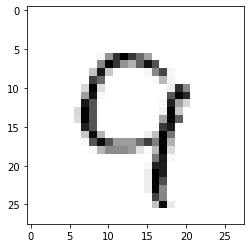

In [9]:
plt.imshow(X, cmap='Greys')
print(f"標記正確答案為 {Y}")

### 3. 資料整理

原本 $28 \times 28$ 的矩陣, 我們改為 784 維的向量, 並且都除以 255。要注意在 `pytorch` 的 tensor 運算中, 255 要很明確的告訴 `pytorch` 是浮點數

In [10]:
x_train = mnist_train.data.reshape(no_train, 784) / 255.
x_test = mnist_test.data.reshape(no_test, 784) / 255.

再來是訓練和測試資料的輸出 (正確答案)。這裡有個 `pytroch` 小技巧, 就是等等我們用 Cross Entropy 當 loss function 的時候, `pytorch` 不需要把我們這些輸出改為 one-hot encoding, 計算時自動會依 one-hot encoding 去計算。

In [11]:
y_train = mnist_train.targets
y_test = mnist_test.targets

### 4. step 1: 打造神經網路

打造神經網路和 `tf.Keras` 風非常像! 如果要做兩層隱藏層, 各 100 個神經元是這樣做的。

In [12]:
model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10))

再次注意輸出層沒有用 `Softmax`, 這是 (再一次) `pytorch` 的 Cross Entropy 就內建了。

### 定義 (選擇) 我們的 loss function 和優化方式

In [13]:
loss_fcn = nn.CrossEntropyLoss()

In [14]:
optimizer = SGD(model.parameters(), lr=0.087)

### 5. step 2: 訓練

我們先來慢動作做一次! 現在我們的 model 就是我們函數學習機, 已經可以動作! 於是我們要計算 loss, 當然是...

In [15]:
predict = model(x_train)

In [17]:
loss = loss_fcn(predict, y_train)

也可欣賞一下 loss 大小。

In [18]:
loss

tensor(2.3077, grad_fn=<NllLossBackward0>)

這時我們可以對 loss 做 gradient descent, 不過因為每次要調的大小預設是累進的, 所以我們要做個 gradient 歸零的動作。

In [19]:
optimizer.zero_grad()

接著對 loss 做 backpropagation。

In [20]:
loss.backward()

再把參數更新!

In [21]:
optimizer.step()

計算一下正確率...

In [22]:
predict = model(x_train)

In [23]:
_, predict_class = torch.max(predict, 1)

In [24]:
acc = (predict_class == y_train).sum() / float(no_train)*100

In [25]:
print(f"目前正確率 {acc:.2f}%")

目前正確率 11.83%


現在合起來做!

In [27]:
predict = model(x_train)

for i in range(10):
    loss = loss_fcn(predict, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predict = model(x_train)
    _, predict_class = torch.max(predict, 1)
    acc = (predict_class == y_train).sum() / float(no_train)*100
    print(f"目前正確率 {acc:.2f}%")

目前正確率 12.65%
目前正確率 13.34%
目前正確率 14.03%
目前正確率 14.77%
目前正確率 15.53%
目前正確率 16.42%
目前正確率 17.31%
目前正確率 18.23%
目前正確率 19.39%
目前正確率 20.46%


### 6. step 3: 預測 (testing)

In [28]:
predict = model(x_test)
_, predict_class = torch.max(predict, 1)

In [29]:
acc = (predict_class == y_test).sum() / float(no_test)*100
print(f"測試資料正確率為 {acc:.2f}%")

測試資料正確率為 21.27%


神經網路預測是: tensor(2)


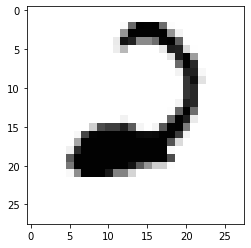

In [30]:
n = 9487

print('神經網路預測是:', predict_class[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');